# Лабораторна робота номер 4
### ФБ-24 Довгаль Анна

### Другий рівень (ускладнений)

Обрала датасет з інформацією для передбачення захворювання нирок

<img src=".\\Screenshot 2024-04-15 181656.png"/>

            	age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wbcc		-	white blood cell count
			rbcc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class

Для початку імпортуємо бібліотеки та створимо датафрейм

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def read_file(path):
    try:
        df = pd.read_csv(path, na_values=['?'])
        df.columns = df.columns.str.strip("'")
        return df
        
    except FileNotFoundError:
        print(f"Файл '{path}' не знайдено.")
    except Exception as e:
        print(f"Помилка при відкритті файлу: {e}")
    
df = read_file('.\\csv_result-chronic_kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,397,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,398,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,399,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Перетворення на масив:

In [3]:
npdf = df.to_numpy()
npdf

array([[1, 48.0, 80.0, ..., 'no', 'no', 'ckd'],
       [2, 7.0, 50.0, ..., 'no', 'no', 'ckd'],
       [3, 62.0, 80.0, ..., 'no', 'yes', 'ckd'],
       ...,
       [398, 12.0, 80.0, ..., 'no', 'no', 'notckd'],
       [399, 17.0, 60.0, ..., 'no', 'no', 'notckd'],
       [400, 58.0, 80.0, ..., 'no', 'no', 'notckd']], dtype=object)

Функція для роботи з числовими колонками масиву:

In [4]:
def get_num_col(npdf):
    numeric_columns = []

    for i in range(npdf.shape[1]): # кількість колонок
        if isinstance(npdf[0, i], (int, float)):
            numeric_columns.append(i)
    
    numeric_columns = numeric_columns[1:]
    numeric_npdf = npdf[:, numeric_columns].astype(float)

    return numeric_npdf, numeric_columns

1. Поборотися із зниклими даними.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [6]:
print(df.isnull().sum())

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [36]:
int_float_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[int_float_columns] = df[int_float_columns].fillna(df[int_float_columns].mean())
df = df.dropna(axis=0)
npdf = df.to_numpy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 2 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      233 non-null    int64  
 1   age     233 non-null    float64
 2   bp      233 non-null    float64
 3   sg      233 non-null    float64
 4   al      233 non-null    float64
 5   su      233 non-null    float64
 6   rbc     233 non-null    object 
 7   pc      233 non-null    object 
 8   pcc     233 non-null    object 
 9   ba      233 non-null    object 
 10  bgr     233 non-null    float64
 11  bu      233 non-null    float64
 12  sc      233 non-null    float64
 13  sod     233 non-null    float64
 14  pot     233 non-null    float64
 15  hemo    233 non-null    float64
 16  pcv     233 non-null    float64
 17  wbcc    233 non-null    float64
 18  rbcc    233 non-null    float64
 19  htn     233 non-null    object 
 20  dm      233 non-null    object 
 21  cad     233 non-null    object 
 22  appet  

C:\Temp\ipykernel_16644\3942768665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_float_columns] = df[int_float_columns].fillna(df[int_float_columns].mean())


2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [37]:
def norm(df):
    dfr = df.copy() 
    numeric_columns = dfr.select_dtypes(include=['int64', 'float64']).columns[1:]
    for column in numeric_columns:
        dfr[column] = (dfr[column] - dfr[column].min()) / (dfr[column].max() - dfr[column].min())
    return dfr

df_normalized = norm(df)
df_normalized

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
2,3,0.740741,0.500000,0.25,0.4,0.6,normal,normal,notpresent,notpresent,...,0.488889,0.219008,0.441938,no,yes,no,poor,no,yes,ckd
3,4,0.567901,0.333333,0.00,0.8,0.0,normal,abnormal,present,notpresent,...,0.511111,0.185950,0.305085,yes,no,no,poor,yes,yes,ckd
4,5,0.604938,0.500000,0.25,0.4,0.0,normal,normal,notpresent,notpresent,...,0.577778,0.210744,0.423729,no,no,no,good,no,no,ckd
7,8,0.271605,0.441151,0.50,0.4,0.8,normal,abnormal,notpresent,notpresent,...,0.777778,0.194215,0.491525,no,yes,no,good,yes,no,ckd
8,9,0.617284,0.833333,0.50,0.6,0.0,normal,abnormal,present,notpresent,...,0.533333,0.305785,0.322034,yes,yes,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0.654321,0.500000,0.75,0.0,0.0,normal,normal,notpresent,notpresent,...,0.844444,0.185950,0.474576,no,no,no,good,no,no,notckd
396,397,0.493827,0.333333,1.00,0.0,0.0,normal,normal,notpresent,notpresent,...,1.000000,0.231405,0.694915,no,no,no,good,no,no,notckd
397,398,0.123457,0.500000,0.75,0.0,0.0,normal,normal,notpresent,notpresent,...,0.888889,0.181818,0.559322,no,no,no,good,no,no,notckd
398,399,0.185185,0.166667,1.00,0.0,0.0,normal,normal,notpresent,notpresent,...,0.933333,0.206612,0.644068,no,no,no,good,no,no,notckd


In [38]:
def stand(df):
    dfr = df.copy()
    numeric_columns = dfr.select_dtypes(include=['int64', 'float64']).columns[1:]
    for column in numeric_columns:
        mean = dfr[column].mean()
        std = dfr[column].std()
        dfr[column] = (dfr[column] - mean) / std
    return dfr

df_standarnized = stand(df)
df_standarnized

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
2,3,0.784516,0.424871,-1.523840,0.656195,2.876799,normal,normal,notpresent,notpresent,...,-1.037883,-0.303636,-0.141894,no,yes,no,poor,no,yes,ckd
3,4,-0.053139,-0.432879,-2.395180,2.046244,-0.348095,normal,abnormal,present,notpresent,...,-0.925696,-0.576108,-1.028263,yes,no,no,poor,yes,yes,ckd
4,5,0.126359,0.424871,-1.523840,0.656195,-0.348095,normal,normal,notpresent,notpresent,...,-0.589136,-0.371754,-0.259832,no,no,no,good,no,no,ckd
7,8,-1.489119,0.122006,-0.652501,0.656195,3.951763,normal,abnormal,notpresent,notpresent,...,0.420544,-0.507990,0.179272,no,yes,no,good,yes,no,ckd
8,9,0.186191,2.140370,-0.652501,1.351220,-0.348095,normal,abnormal,present,notpresent,...,-0.813509,0.411601,-0.918488,yes,yes,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0.365689,0.424871,0.218839,-0.733853,-0.348095,normal,normal,notpresent,notpresent,...,0.757104,-0.576108,0.069496,no,no,no,good,no,no,notckd
396,397,-0.412134,-0.432879,1.090178,-0.733853,-0.348095,normal,normal,notpresent,notpresent,...,1.542410,-0.201460,1.496583,no,no,no,good,no,no,notckd
397,398,-2.207109,0.424871,0.218839,-0.733853,-0.348095,normal,normal,notpresent,notpresent,...,0.981477,-0.610167,0.618376,no,no,no,good,no,no,notckd
398,399,-1.907947,-1.290628,1.090178,-0.733853,-0.348095,normal,normal,notpresent,notpresent,...,1.205850,-0.405813,1.167255,no,no,no,good,no,no,notckd


In [39]:
def norm_np(npdf):
    numeric_npdf, numeric_columns = get_num_col(npdf)

    normalized_numeric_npdf = (numeric_npdf - numeric_npdf.min(axis=0)) / (numeric_npdf.max(axis=0) - numeric_npdf.min(axis=0))

    normalized_npdf = np.copy(npdf)
    normalized_npdf[:, numeric_columns] = normalized_numeric_npdf
    return normalized_npdf

normalized_npdf = norm_np(npdf)
normalized_npdf


array([[3, 0.7407407407407407, 0.5, ..., 'no', 'yes', 'ckd'],
       [4, 0.5679012345679012, 0.3333333333333333, ..., 'yes', 'yes',
        'ckd'],
       [5, 0.6049382716049383, 0.5, ..., 'no', 'no', 'ckd'],
       ...,
       [398, 0.12345679012345678, 0.5, ..., 'no', 'no', 'notckd'],
       [399, 0.18518518518518517, 0.16666666666666666, ..., 'no', 'no',
        'notckd'],
       [400, 0.691358024691358, 0.5, ..., 'no', 'no', 'notckd']],
      dtype=object)

In [40]:
def standardize_np(npdf):
    numeric_npdf, numeric_columns = get_num_col(npdf)

    mean = numeric_npdf.mean(axis=0)
    std = numeric_npdf.std(axis=0)
    standardized_numeric_npdf = (numeric_npdf - mean) / std

    standardized_npdf = np.copy(npdf)
    standardized_npdf[:, numeric_columns] = standardized_numeric_npdf

    return standardized_npdf

standardized_npdf = standardize_np(npdf)
standardized_npdf


array([[3, 0.7862052292822153, 0.42578552882231646, ..., 'no', 'yes',
        'ckd'],
       [4, -0.05325324441680746, -0.43381060667685134, ..., 'yes', 'yes',
        'ckd'],
       [5, 0.1266307142329831, 0.42578552882231646, ..., 'no', 'no',
        'ckd'],
       ...,
       [398, -2.2118607482142942, 0.42578552882231646, ..., 'no', 'no',
        'notckd'],
       [399, -1.9120541504646433, -1.2934067421760191, ..., 'no', 'no',
        'notckd'],
       [400, 0.5463599510824945, 0.42578552882231646, ..., 'no', 'no',
        'notckd']], dtype=object)

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

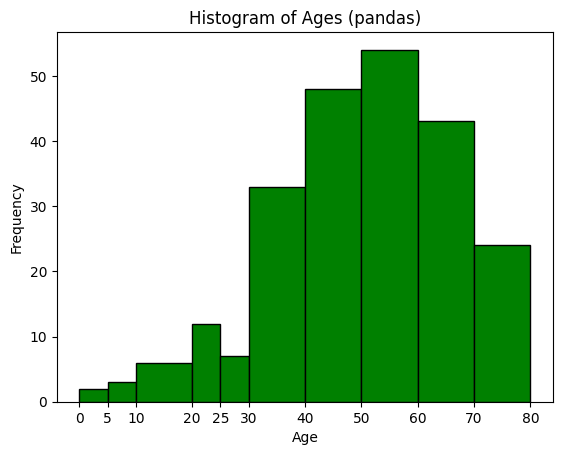

In [41]:
bins = [0, 5, 10, 20, 25, 30, 40, 50, 60, 70, 80]

plt.hist(df['age'], bins=bins, edgecolor='black', facecolor='green')
plt.xticks(bins)
plt.title('Histogram of Ages (pandas)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

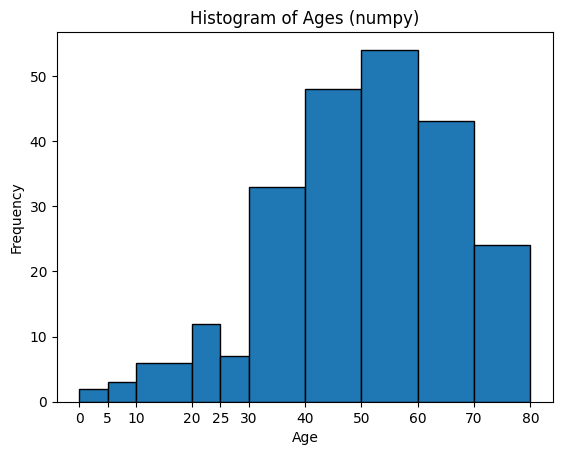

In [42]:
numeric_npdf = get_num_col(npdf)[0]

bins = [0, 5, 10, 20, 25, 30, 40, 50, 60, 70, 80]

plt.hist(numeric_npdf[:, 0], bins=bins, edgecolor='black')
plt.xticks(bins)

plt.title('Histogram of Ages (numpy)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

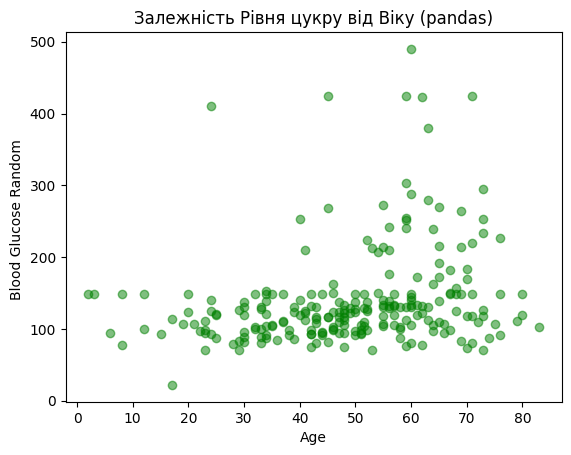

In [43]:
plt.scatter(df['age'], df['bgr'], alpha=0.5, color='green') 
plt.title('Залежність Рівня цукру від Віку (pandas)')  
plt.xlabel('Age') 
plt.ylabel('Blood Glucose Random ')  

plt.show()

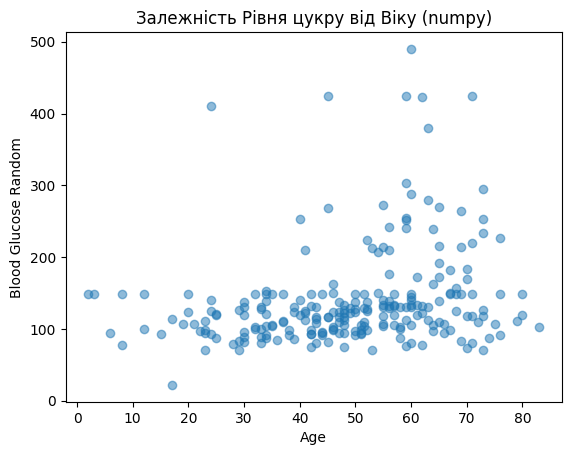

In [44]:
numeric_npdf = get_num_col(npdf)[0]

plt.scatter(numeric_npdf[:, 0], numeric_npdf[:, 5], alpha=0.5) 
plt.title('Залежність Рівня цукру від Віку (numpy)')  
plt.xlabel('Age') 
plt.ylabel('Blood Glucose Random')  

plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [45]:
pearson_corr = df['age'].corr(df['bgr'])
print("Коефіцієнт Пірсона:", pearson_corr)

spearman_corr = df['age'].corr(df['bgr'], method='spearman')
print("Коефіцієнт Спірмена:", spearman_corr)

Коефіцієнт Пірсона: 0.25466003860649283
Коефіцієнт Спірмена: 0.30116739888114996


In [46]:
from scipy.stats import spearmanr, pearsonr

numeric_npdf = get_num_col(npdf)[0]

x = numeric_npdf[:, 0]
y = numeric_npdf[:, 5]

spearman_corr, pval = spearmanr(x, y)
pearson_corr, pval = pearsonr(x, y)

print("Коефіцієнт Пірсона:", pearson_corr)
print("Коефіцієнт Спірмена:", spearman_corr)

Коефіцієнт Пірсона: 0.2546600386064929
Коефіцієнт Спірмена: 0.30116739888114996


6. Провести One Hot Encoding категоріального string атрибуту.

In [47]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['class'])
print(one_hot_encoded_data[['id', 'class_ckd', 'class_notckd']])

      id  class_ckd  class_notckd
2      3       True         False
3      4       True         False
4      5       True         False
7      8       True         False
8      9       True         False
..   ...        ...           ...
395  396      False          True
396  397      False          True
397  398      False          True
398  399      False          True
399  400      False          True

[233 rows x 3 columns]


In [48]:
strcol = npdf[:, 6]

def one_hot_np(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

print(strcol[:5])
print(one_hot_np(strcol)[:5, :])

['normal' 'normal' 'normal' 'normal' 'normal']
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


7. Провести візуалізацію багатовимірних даних, використовуючи
приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

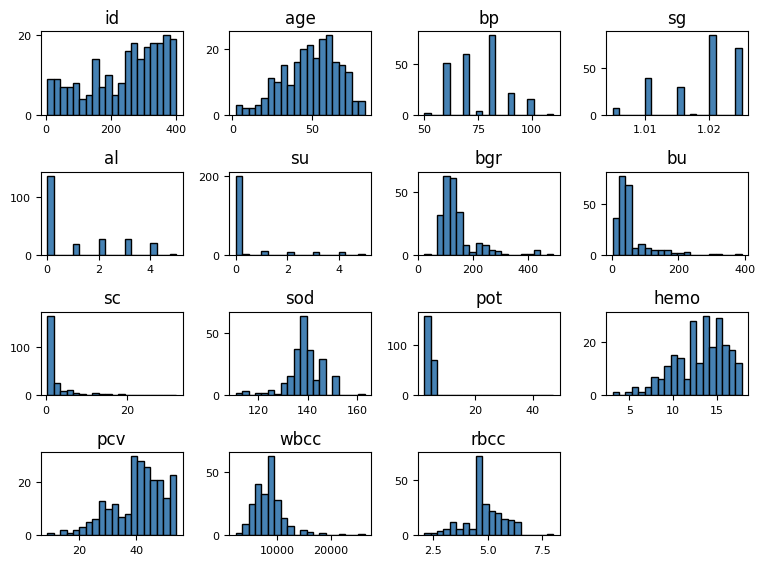

In [49]:
df.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

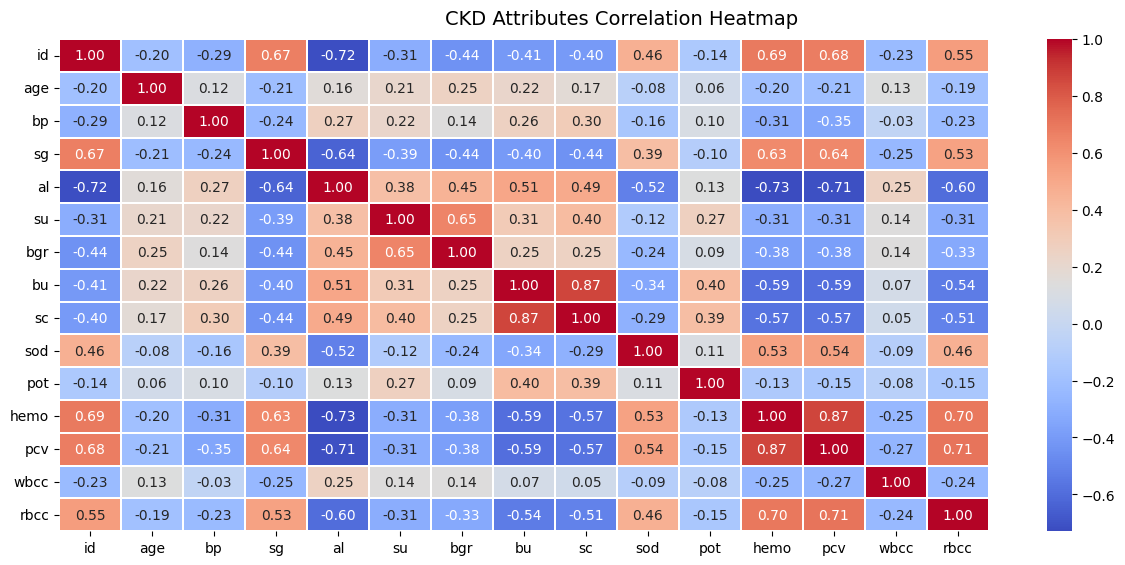

In [50]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 6))
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data_frame = df[numeric_columns]
corr = numeric_data_frame.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('CKD Attributes Correlation Heatmap', fontsize=14)

c:\Users\Aya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


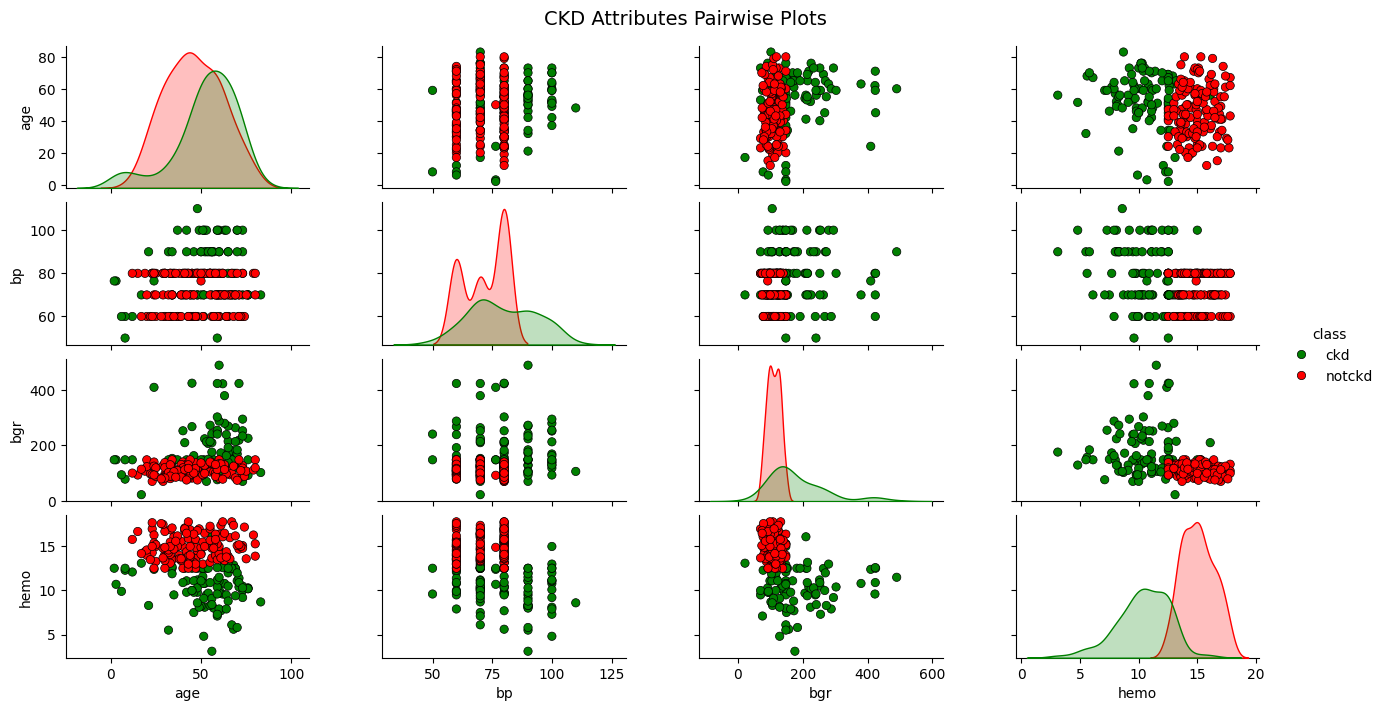

In [51]:
# Scatter Plot with Hue for visualizing data in 3-D

cols = ['age', 'bp', 'bgr', 'hemo', 'class']
pp = sns.pairplot(df[cols], hue='class', size=1.8, aspect=1.8, 
                  palette={"ckd": "g", "notckd": "r"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('CKD Attributes Pairwise Plots', fontsize=14)

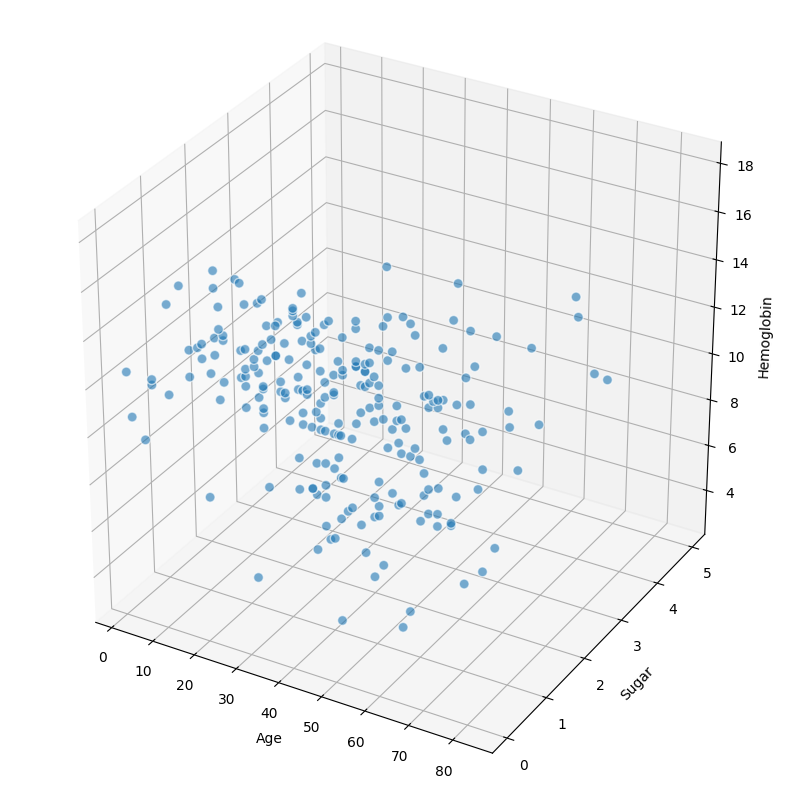

In [281]:

# Visualizing 3-D numeric data with Scatter Plots

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = npdf[:, 1]
ys = npdf[:, 5]
zs = npdf[:, 15]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Sugar')
ax.set_zlabel('Hemoglobin')

ax.set_box_aspect([1,1,1]) 